# 4.10 Coding Etiquette & Excel Reporting Task

## Table of Contents

### 01. Import the data.
### 02. Consider any security implications that might exist for this new data.
### 03. Create a regional segmentation of the data.
### 04. Create an exclusion flag for low-activity customers and exclude them from the data.
### 05. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
### 06. Create an appropriate visualization to show the distribution of profiles.
### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 08. Compare your customer profiles with regions and departments.

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 01. Import the data in a new notebook.

In [2]:
df = pd.read_pickle(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_cust_merged.pkl')

In [3]:
df.shape

(32404859, 26)

In [4]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,max_order,loyalty_flag,spender_flag,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,32,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,5,New customer,Low spender,Frequent customer,Female,Vermont,66,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,3,New customer,Low spender,Frequent customer,Female,Wisconsin,40,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,3,New customer,Low spender,Frequent customer,Female,Wisconsin,40,3,married,31308


# 02. Consider any security implications that might exist for this new data.

### Any identifiable personal information was removed during the data preparation stage. This information included the first name and surname of the customer but was not pertinent to the analysis.

# 03. Create a regional segmentation of the data.

In [5]:
# Creating a list to group each region

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest =  ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [6]:
# Assigning the states in the dataframe to the regions

df.loc[df['STATE'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['STATE'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['STATE'].isin(South), 'region'] = 'South'
df.loc[df['STATE'].isin(West), 'region'] = 'West'

In [7]:
#Checking the results

df['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

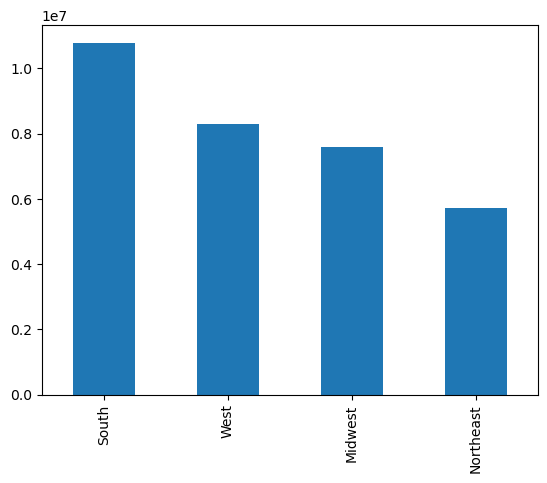

In [8]:
#Creating bar chart on regions

bar = df['region'].value_counts().plot.bar()

In [9]:
bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/bar_regions.png')

### Among all regions, the south has the highest number of orders placed. The west is the second highest region with the most orders.

In [10]:
#Determining whether there’s a difference in spending habits between the different U.S. regions

crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [11]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [12]:
df['spender_flag'].value_counts(dropna=False)

Low spender     31770614
High spender      634245
Name: spender_flag, dtype: int64

### Spending habits across all regions are quite similar with the exception of the South having slightly more low spenders.

# 04.  Create an exclusion flag for low-activity customers and exclude them from the data.

In [13]:
# Creating an exclusion flag for low-activity customers

df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity' 

df.loc[df['max_order'] >= 5, 'activity_flag'] = 'Mod-High activity'

In [14]:
#Checking results

df['activity_flag'].value_counts(dropna=False)

Mod-High activity    30964564
Low activity          1440295
Name: activity_flag, dtype: int64

In [15]:
#Creating new dataframe for low activity customers that will be removed from originial dataframe.

df_low_act = df[df['activity_flag'] == 'Low activity']

In [16]:
df_low_act

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spender_flag,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,region,activity_flag
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Low spender,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest,Low activity
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Low spender,Frequent customer,Female,Wisconsin,40,3,married,31308,Midwest,Low activity
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,1,2,12,...,Low spender,Frequent customer,Male,Kansas,41,2,married,122060,Midwest,Low activity
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,2,2,10,...,Low spender,Frequent customer,Male,Kansas,41,2,married,122060,Midwest,Low activity
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,3,4,17,...,Low spender,Frequent customer,Male,Kansas,41,2,married,122060,Midwest,Low activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404827,49688,Fresh Foaming Cleanser,73,11,13.5,967902,157883,3,0,17,...,Low spender,Non-frequent customer,Female,Missouri,28,1,married,89497,Midwest,Low activity
32404839,49688,Fresh Foaming Cleanser,73,11,13.5,1400940,166213,1,1,21,...,Low spender,Frequent customer,Female,Arkansas,52,2,married,125863,South,Low activity
32404841,49688,Fresh Foaming Cleanser,73,11,13.5,307087,172262,4,6,11,...,Low spender,Non-frequent customer,Female,Michigan,59,1,married,118691,Midwest,Low activity
32404842,49688,Fresh Foaming Cleanser,73,11,13.5,2454083,176942,2,6,20,...,Low spender,Frequent customer,Male,Nevada,39,0,single,64061,West,Low activity


In [17]:
#Exporting dataframe with low activity customers

df_low_act.to_pickle(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/02 Data/Prepared Data/low_activity_customers.pkl')

In [18]:
#Creating new dataframe with the Mon-High activity customers only.

df_remaining = df[df['activity_flag'] == 'Mod-High activity']

In [19]:
#Verifying correct count

df_remaining.shape

(30964564, 28)

# 05. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents AND

# 06. Create an appropriate visualization to show the distribution of profiles.

In [20]:
# Identifying basic information in dataframe

df_remaining.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,Age,n_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,2.559850e+04,7.118859e+01,9.922365e+00,1.193352e+01,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,8.363038e+00,6.061019e-01,3.442569e+01,4.946803e+01,1.501819e+00,9.967587e+04
std,1.408096e+04,3.822194e+01,6.282441e+00,4.913444e+02,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,7.135399e+00,4.886127e-01,2.489504e+01,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,3.300000e+01,1.000000e+00,6.729200e+04
50%,2.528800e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,4.900000e+01,2.000000e+00,9.676500e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [21]:
df_remaining['income'].min()

25903

In [22]:
df_remaining['income'].max()

593901

In [23]:
# Profiling based on age

df_remaining.loc[df_remaining['Age'] <= 29, 'age_group'] = '18-29'
df_remaining.loc[(df_remaining['Age'] > 29) & (df_remaining['Age'] < 40), 'age_group'] = '30-39'
df_remaining.loc[(df_remaining['Age'] > 39) & (df_remaining['Age'] < 50), 'age_group'] = '40-49'
df_remaining.loc[(df_remaining['Age'] > 49) & (df_remaining['Age'] < 60), 'age_group'] = '50-59'
df_remaining.loc[(df_remaining['Age'] > 59) & (df_remaining['Age'] < 70), 'age_group'] = '60-69'
df_remaining.loc[df_remaining['Age'] > 69, 'age_group'] = '70 and older'

/var/folders/99/tvb2qpd57_z8mbxc6n1wywrw0000gn/T/ipykernel_38054/1792383907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remaining.loc[df_remaining['Age'] <= 29, 'age_group'] = '18-29'


In [24]:
df_remaining['age_group'].value_counts(dropna=False)

18-29           5817603
70 and older    5812883
40-49           4883179
30-39           4847507
50-59           4841771
60-69           4761621
Name: age_group, dtype: int64

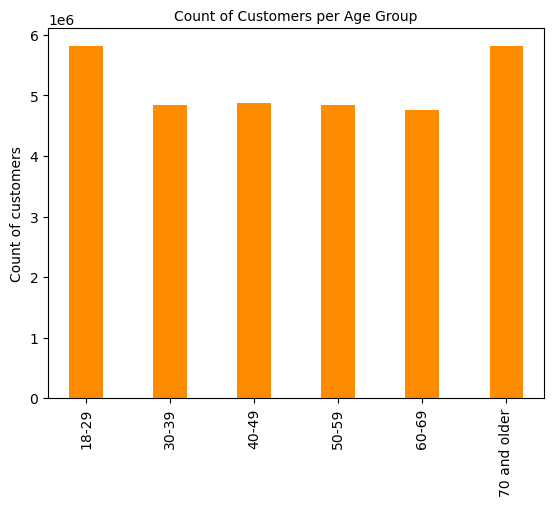

In [25]:
#Creating bar chart for age_group

age_group_bar = df_remaining['age_group'].value_counts().sort_index().plot.bar(color = 'darkorange', width = 0.4)
plt.title('Count of Customers per Age Group', fontsize =10 )
plt.ylabel('Count of customers')
plt.show()

## There is no major difference between age groups in terms of a customer base. Age groups 18-29 and 70+ show a slightly higher count.

In [26]:
#Exporting bar chart

age_group_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/age_group_bar.png')

In [27]:
# Profiling based on income

df_remaining.loc[df_remaining['income'] <= 50000, 'income_group'] = '50,000 or less'
df_remaining.loc[(df_remaining['income'] > 50000) & (df_remaining['income'] < 100001), 'income_group'] = '50,001 to 100,000'
df_remaining.loc[(df_remaining['income'] > 100000) & (df_remaining['income'] < 200001), 'income_group'] = '100,001 to 200,000'
df_remaining.loc[(df_remaining['income'] > 200000) & (df_remaining['income'] < 400001), 'income_group'] = '200,001 to 400,000'
df_remaining.loc[(df_remaining['income'] > 400000) , 'income_group'] = '400,001+'


/var/folders/99/tvb2qpd57_z8mbxc6n1wywrw0000gn/T/ipykernel_38054/4151190545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remaining.loc[df_remaining['income'] <= 50000, 'income_group'] = '50,000 or less'


In [28]:
df_remaining['income_group'].value_counts()

100,001 to 200,000    13952886
50,001 to 100,000     13394982
50,000 or less         3362554
200,001 to 400,000      207146
400,001+                 46996
Name: income_group, dtype: int64

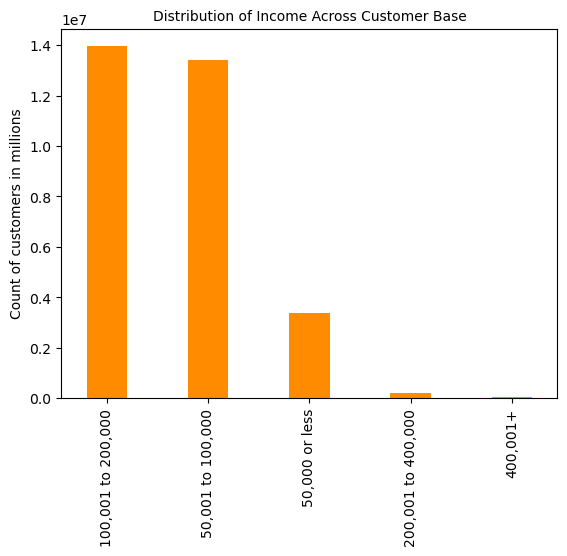

In [29]:
#Creating bar chart for income_group

income_bar = df_remaining['income_group'].value_counts().plot.bar(color = 'darkorange', width = 0.4)
plt.title('Distribution of Income Across Customer Base', fontsize =10 )
plt.ylabel('Count of customers in millions')
plt.show()

## The two income groups with significantly higher orders are people who earn 51-100k and 100-200k. 

In [30]:
#Exporting bar chart

income_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/income_bar.png')

In [31]:
#Most ordered product in dataframe:

df_remaining['product_name'].mode()

0    Banana
Name: product_name, dtype: object

In [32]:
#Most frequent department ordered from.

df_remaining['department_id'].mode()

0    4
Name: department_id, dtype: int64

## Department id 4 is the produce department. 

In [33]:

crosstab = pd.crosstab(df_remaining['age_group'], df_remaining['income_group'], dropna = False)

In [34]:
crosstab

income_group,"100,001 to 200,000","200,001 to 400,000","400,001+","50,000 or less","50,001 to 100,000"
age_group,,,,,
18-29,164448,20772,0,899407,4732976
30-39,141138,18504,0,751140,3936725
40-49,3041066,46754,15059,418567,1361733
50-59,3320244,35581,7744,420480,1057722
60-69,3281440,40431,10452,395056,1034242
70 and older,4004550,45104,13741,477904,1271584


In [35]:
crosstab = pd.crosstab(df_remaining['age_group'], df_remaining['n_dependants'], dropna = False)

In [36]:
crosstab

n_dependants,0,1,2,3
age_group,,,,
18-29,1447618,1463570,1444342,1462073
30-39,1212957,1195975,1225493,1213082
40-49,1213734,1240945,1207899,1220601
50-59,1220101,1235463,1170936,1215271
60-69,1204466,1137258,1204741,1215156
70 and older,1440805,1445895,1479850,1446333


In [37]:
#Getting a baseline for the family status in this dataframe in order to label additional family flags.

df_remaining['fam_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

## Married customers account for 70% of the active customer base. The least common family status are customers who are living with parents and siblings (assuming minors).

In [38]:
#Creating family type flag to profile customers based on dependents

df_remaining.loc[(df_remaining['fam_status'] =='single') & (df_remaining['n_dependants'] == 0), 'family_flag'] = 'single adult no dependent'
df_remaining.loc[(df_remaining['fam_status'] =='single') & (df_remaining['n_dependants'] >= 1), 'family_flag'] = 'single adult with dependent'
df_remaining.loc[(df_remaining['fam_status'] =='married') & (df_remaining['n_dependants'] == 0), 'family_flag'] = 'married adult no dependent'
df_remaining.loc[(df_remaining['fam_status'] =='married') & (df_remaining['n_dependants'] >= 1), 'family_flag'] = 'married adult with dependent'
df_remaining.loc[(df_remaining['fam_status'] =='divorced/widowed') & (df_remaining['n_dependants'] == 0), 'family_flag'] = 'divorced/widowed adult no dependent'
df_remaining.loc[(df_remaining['fam_status'] =='divorced/widowed') & (df_remaining['n_dependants'] >= 1), 'family_flag'] = 'divorced/widowed adult with dependent'
df_remaining.loc[(df_remaining['fam_status'] =='living with parents and siblings'), 'family_flag'] = 'living with parents and siblings'


/var/folders/99/tvb2qpd57_z8mbxc6n1wywrw0000gn/T/ipykernel_38054/946163303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remaining.loc[(df_remaining['fam_status'] =='single') & (df_remaining['n_dependants'] == 0), 'family_flag'] = 'single adult no dependent'


In [39]:
# Results of family status vs. # of dependents

df_remaining['family_flag'].value_counts(dropna=False)

married adult with dependent           21743711
single adult no dependent               5094410
divorced/widowed adult no dependent     2645271
living with parents and siblings        1481172
Name: family_flag, dtype: int64

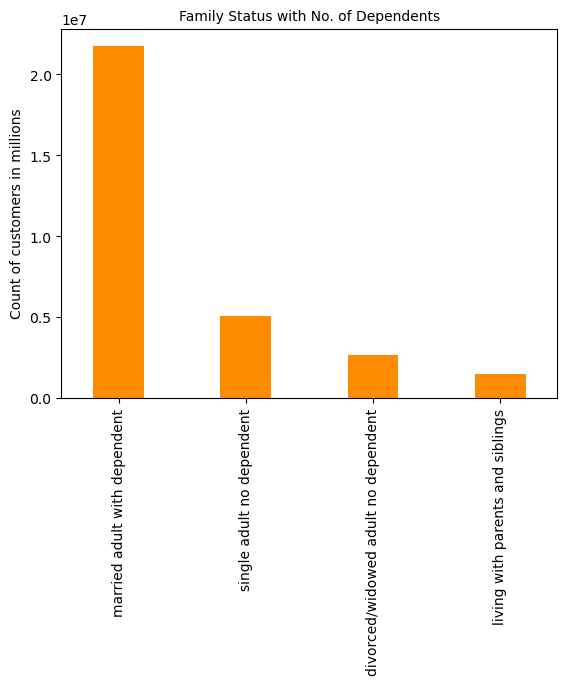

In [40]:
#Plotting the distribution of family status results

fam_status_bar = df_remaining['family_flag'].value_counts().plot.bar(color = 'darkorange', width = 0.4)
plt.title('Family Status with No. of Dependents', fontsize =10 )
plt.ylabel('Count of customers in millions')
plt.show()

## According to this customer data there are no single adults with dependents. 
## The predominant customer type are married adults with children. 
### Disclaimer: This customer data was fabricated for the purpose of this project. This does not represent the true population of instacart customers.

In [41]:
#Exporting bar chart

fam_status_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/fam_status_bar.png')

In [42]:
df_remaining['n_dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: n_dependants, dtype: int64

In [43]:
#Profiling parents based on age

df_remaining.loc[(df_remaining['Age'] <= 29) & (df_remaining['n_dependants'] > 0), 'parent_flag'] = 'young parent'
df_remaining.loc[(df_remaining['Age'] >= 30) & (df_remaining['n_dependants'] > 0), 'parent_flag'] = 'older parent'


/var/folders/99/tvb2qpd57_z8mbxc6n1wywrw0000gn/T/ipykernel_38054/329176040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remaining.loc[(df_remaining['Age'] <= 29) & (df_remaining['n_dependants'] > 0), 'parent_flag'] = 'young parent'


In [44]:
df_remaining['parent_flag'].value_counts()

older parent    18854898
young parent     4369985
Name: parent_flag, dtype: int64

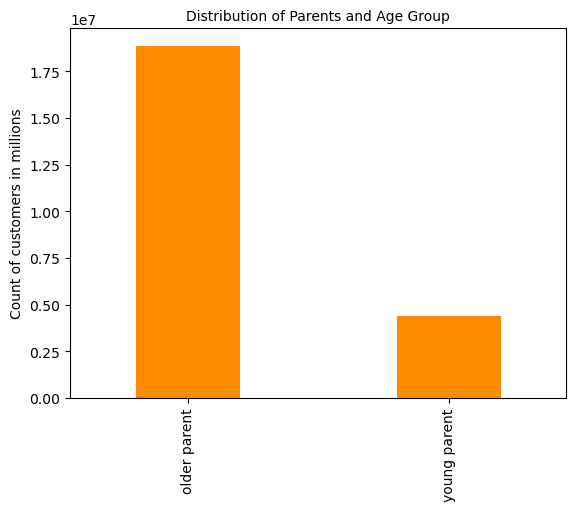

In [45]:
Parent_flag_bar = df_remaining['parent_flag'].value_counts().plot.bar(color = 'darkorange', width = 0.4)
plt.title('Distribution of Parents and Age Group', fontsize =10 )
plt.ylabel('Count of customers in millions')
plt.show()

## Among the customers who have dependents, the majority of them are people aged 30 and over. 
## The "young parents" make up about 18% of the customers with dependents. 

In [46]:
#Exporting bar chart

Parent_flag_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/parent_flag_bar.png')

# 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [47]:
#Aggregating the region variable

region_agg = df_remaining.groupby('region').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max'],'orders_day_of_week': ['min', 'mean', 'max'],'order_hour_of_day': ['min', 'mean', 'max'], 'Age': ['min', 'mean', 'max']})
region_agg

order_id days_since_prior_order                  prices             \
              count                    min       mean   max    min       mean   
region                                                                          
Midwest     7261513                    0.0  10.892736  30.0    1.0  12.681835   
Northeast   5464685                    0.0  10.774220  30.0    1.0  11.542582   
South      10311139                    0.0  10.814227  30.0    1.0  12.118845   
West        7927227                    0.0  10.754622  30.0    1.0  11.276491   

                   orders_day_of_week               order_hour_of_day  \
               max                min      mean max               min   
region                                                                  
Midwest    99999.0                  0  2.741556   6                 0   
Northeast  99999.0                  0  2.737948   6                 0   
South      99999.0                  0  2.743692   6                 0   
West       99999.0                  0  2.740643   6                 0   

                         Age                 
                mean max min       mean max  
region                                       
Midwest    13.429114  23  18  49.451335  81  
Northeast  13.410177  23  18  49.605946  81  
South      13.403529  23  18  49.320375  81  
West       13.404618  23  18  49.580291  81

In [48]:
#Aggregating the age variable

age_agg = df_remaining.groupby('age_group').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max'],'order_hour_of_day': ['min', 'mean', 'max'], 'n_dependants': ['min', 'mean', 'max']})
age_agg

order_id days_since_prior_order                  prices  \
                count                    min       mean   max    min   
age_group                                                              
18-29         5817603                    0.0  10.815269  30.0    1.0   
30-39         4847507                    0.0  10.806490  30.0    1.0   
40-49         4883179                    0.0  10.796786  30.0    1.0   
50-59         4841771                    0.0  10.842821  30.0    1.0   
60-69         4761621                    0.0  10.791545  30.0    1.0   
70 and older  5812883                    0.0  10.808135  30.0    1.0   

                                 order_hour_of_day                 \
                   mean      max               min       mean max   
age_group                                                           
18-29         12.198693  99999.0                 0  13.390934  23   
30-39         11.884014  99999.0                 0  13.409064  23   
40-49         12.271280  99999.0                 0  13.422160  23   
50-59         11.780440  99999.0                 0  13.415367  23   
60-69         11.535232  99999.0                 0  13.424259  23   
70 and older  11.879447  99999.0                 0  13.408722  23   

             n_dependants                
                      min      mean max  
age_group                                
18-29                   0  1.502074   3  
30-39                   0  1.503083   3  
40-49                   0  1.498726   3  
50-59                   0  1.491840   3  
60-69                   0  1.510454   3  
70 and older            0  1.504347   3

In [49]:
#Aggregating the income variable

income_agg = df_remaining.groupby('income_group').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max'],'orders_day_of_week': ['min', 'mean', 'max'],'order_hour_of_day': ['min', 'mean', 'max'], 'Age': ['min', 'mean', 'max'],'n_dependants': ['min', 'mean', 'max']})
income_agg

order_id days_since_prior_order                  prices  \
                       count                    min       mean   max    min   
income_group                                                                  
100,001 to 200,000  13952886                    0.0  10.782121  30.0    1.0   
200,001 to 400,000    207146                    0.0  10.044455  30.0    1.0   
400,001+               46996                    0.0  10.308500  30.0    1.0   
50,000 or less       3362554                    0.0  11.175808  30.0    1.0   
50,001 to 100,000   13394982                    0.0  10.762110  30.0    1.0   

                                        orders_day_of_week                \
                          mean      max                min      mean max   
income_group                                                               
100,001 to 200,000   12.122358  99999.0                  0  2.746969   6   
200,001 to 400,000  261.895763  99999.0                  0  2.844187   6   
400,001+            222.992836  99999.0                  0  2.738786   6   
50,000 or less        6.707347     25.0                  0  2.752789   6   
50,001 to 100,000     8.442726  99999.0                  0  2.731152   6   

                   order_hour_of_day                Age                 \
                                 min       mean max min       mean max   
income_group                                                             
100,001 to 200,000                 0  13.453110  23  18  60.264790  81   
200,001 to 400,000                 0  13.165888  23  18  54.149165  81   
400,001+                           0  13.395736  23  41  60.346370  81   
50,000 or less                     0  13.213969  23  18  44.609113  81   
50,001 to 100,000                  0  13.420398  23  18  39.330753  81   

                   n_dependants                
                            min      mean max  
income_group                                   
100,001 to 200,000            0  1.501535   3  
200,001 to 400,000            0  1.485315   3  
400,001+                      0  1.562388   3  
50,000 or less                0  1.500153   3  
50,001 to 100,000             0  1.502577   3

In [50]:
#Aggregating the family status variable

family_agg = df_remaining.groupby('family_flag').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max'],'orders_day_of_week': ['min', 'mean', 'max'],'order_hour_of_day': ['min', 'mean', 'max'], 'Age': ['min', 'mean', 'max'],'n_dependants': ['min', 'mean', 'max']})
family_agg

order_id days_since_prior_order  \
                                        count                    min   
family_flag                                                            
divorced/widowed adult no dependent   2645271                    0.0   
living with parents and siblings      1481172                    0.0   
married adult with dependent         21743711                    0.0   
single adult no dependent             5094410                    0.0   

                                                     prices             \
                                          mean   max    min       mean   
family_flag                                                              
divorced/widowed adult no dependent  10.750328  30.0    1.0  11.532741   
living with parents and siblings     10.750995  30.0    1.0  10.890167   
married adult with dependent         10.820875  30.0    1.0  11.944390   
single adult no dependent            10.813571  30.0    1.0  12.398586   

                                             orders_day_of_week                \
                                         max                min      mean max   
family_flag                                                                     
divorced/widowed adult no dependent  99999.0                  0  2.751114   6   
living with parents and siblings     99999.0                  0  2.747856   6   
married adult with dependent         99999.0                  0  2.742787   6   
single adult no dependent            99999.0                  0  2.728537   6   

                                    order_hour_of_day                Age  \
                                                  min       mean max min   
family_flag                                                                
divorced/widowed adult no dependent                 0  13.429982  23  60   
living with parents and siblings                    0  13.401284  23  18   
married adult with dependent                        0  13.408010  23  22   
single adult no dependent                           0  13.416615  23  18   

                                                   n_dependants                
                                          mean max          min      mean max  
family_flag                                                                    
divorced/widowed adult no dependent  70.510585  81            0  0.000000   0  
living with parents and siblings     19.502090  21            1  1.986783   3  
married adult with dependent         51.495620  81            1  2.003357   3  
single adult no dependent            38.600037  59            0  0.000000   0

In [51]:
#Aggregating the parent flag variable

parent_agg = df_remaining.groupby('parent_flag').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max'],'orders_day_of_week': ['min', 'mean', 'max'],'order_hour_of_day': ['min', 'mean', 'max'], 'Age': ['min', 'mean', 'max'],'n_dependants': ['min', 'mean', 'max']})
parent_agg

order_id days_since_prior_order                  prices  \
                 count                    min       mean   max    min   
parent_flag                                                             
older parent  18854898                    0.0  10.824609  30.0    1.0   
young parent   4369985                    0.0  10.781080  30.0    1.0   

                                 orders_day_of_week                \
                   mean      max                min      mean max   
parent_flag                                                         
older parent  11.831867  99999.0                  0  2.742217   6   
young parent  12.072566  99999.0                  0  2.746965   6   

             order_hour_of_day                Age                n_dependants  \
                           min       mean max min       mean max          min   
parent_flag                                                                     
older parent                 0  13.413149  23  30  55.478967  81            1   
young parent                 0  13.383561  23  18  23.464968  29            1   

                            
                  mean max  
parent_flag                 
older parent  2.002912   3  
young parent  1.999657   3

# 08. Compare your customer profiles with regions and departments.

## Comparing different customer profiles across regions.

In [52]:
#Crosstab age by region

age_by_region = pd.crosstab(df_remaining['age_group'], df_remaining['region'], dropna = False)
age_by_region

region,Midwest,Northeast,South,West
age_group,,,,
18-29,1355838,1023984,1960651,1477130
30-39,1127163,847753,1647596,1224995
40-49,1174801,859566,1601124,1247688
50-59,1148268,849153,1580347,1264003
60-69,1108493,843815,1590747,1218566
70 and older,1346950,1040414,1930674,1494845


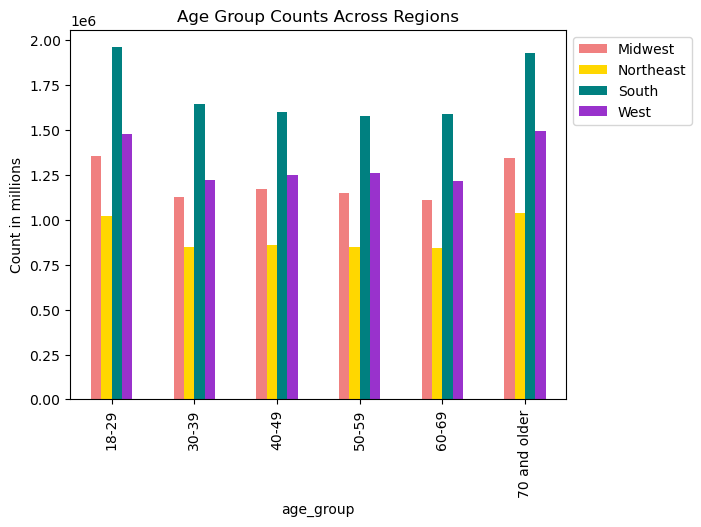

In [53]:
#Assigning colors to regions
region_colors = ['lightcoral', 'gold', 'teal', 'darkorchid']

#Plotting bar chart 
age_region_bar = age_by_region.plot.bar(color = region_colors)
plt.title("Age Group Counts Across Regions")
plt.ylabel("Count in millions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [54]:
age_region_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/age_region_bar.png')

In [55]:
#Crosstab income by region

income_by_region = pd.crosstab(df_remaining['income_group'], df_remaining['region'], dropna = False)
income_by_region

region,Midwest,Northeast,South,West
income_group,,,,
"100,001 to 200,000",3336000,2476378,4580125,3560383
"200,001 to 400,000",47706,33428,71209,54803
"400,001+",16387,6678,12237,11694
"50,000 or less",783764,587137,1142572,849081
"50,001 to 100,000",3077656,2361064,4504996,3451266


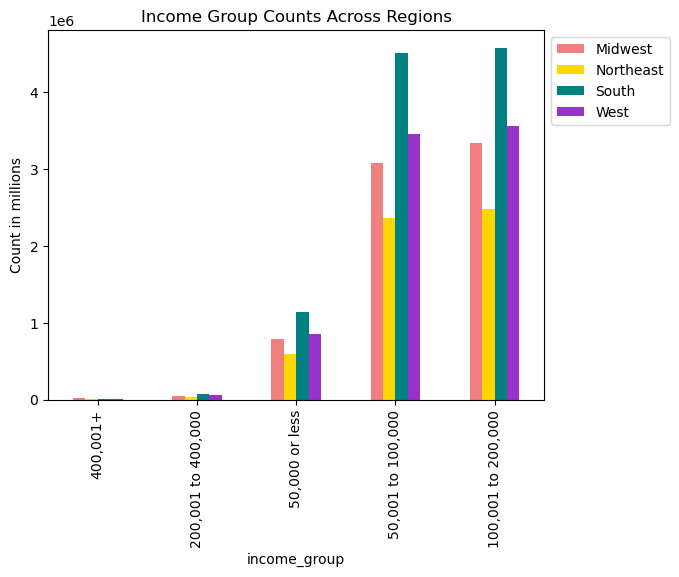

In [56]:
#Plotting bar chart 
income_region_bar = income_by_region.sort_values(by=['South'], ascending=True).plot.bar(color = region_colors)
plt.title("Income Group Counts Across Regions")
plt.ylabel("Count in millions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [57]:
income_region_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/income_region_bar.png')

In [58]:
#Crosstab family status by region

fam_stat_by_region = pd.crosstab(df_remaining['family_flag'], df_remaining['region'], dropna = False)
fam_stat_by_region

region,Midwest,Northeast,South,West
family_flag,,,,
divorced/widowed adult no dependent,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married adult with dependent,5087262,3853773,7223749,5578927
single adult no dependent,1205618,875715,1704619,1308458


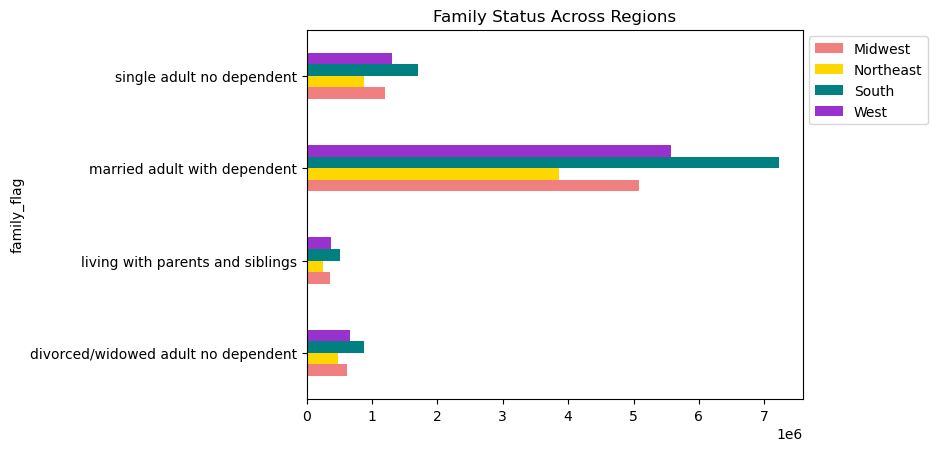

In [59]:
#Plotting bar chart 
fam_stat_region_bar = fam_stat_by_region.plot.barh(color = region_colors)
plt.title("Family Status Across Regions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [60]:
fam_stat_region_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/fam_stat_region_bar.png')

In [61]:
#Crosstab gender by region

gender_by_region = pd.crosstab(df_remaining['Gender'], df_remaining['region'], dropna = False)
gender_by_region

region,Midwest,Northeast,South,West
Gender,,,,
Female,3637482,2639666,5137028,3963648
Male,3624031,2825019,5174111,3963579


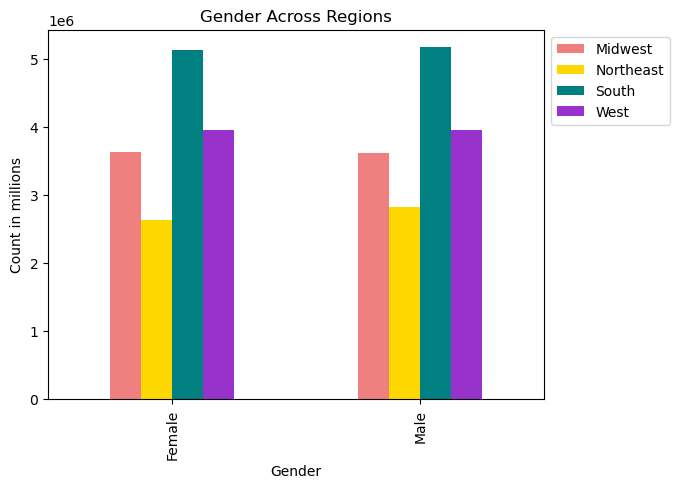

In [62]:
#Plotting bar chart 
gender_region_bar = gender_by_region.plot.bar(color = region_colors)
plt.title("Gender Across Regions")
plt.ylabel("Count in millions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [63]:
gender_region_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/gender_region_bar.png')

## Comparing different customer profiles across store departments.

In [64]:
#Importing department.csv

df_department = pd.read_csv(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/02 Data/Prepared Data/departments_wrangled.csv', index_col=False)

In [65]:
df_department.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [66]:
df_department.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [67]:
df_department

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [68]:
#Merging the departments df with current df

df_final = df_remaining.merge(df_department, on = 'department_id') 

In [69]:
#Crosstab age group vs. departments

age_by_dep = pd.crosstab(df_final['department'],df_final['age_group'], dropna = False)
age_by_dep

age_group,18-29,30-39,40-49,50-59,60-69,70 and older
department,,,,,,
alcohol,27938,23718,22437,22938,21505,26091
babies,77758,63698,67072,63126,63052,75686
bakery,210358,175644,176611,175769,172077,210369
beverages,477655,396518,406669,407390,394285,489384
breakfast,128115,103824,106309,104851,101498,126253
bulk,6414,5210,5384,5019,5180,6244
canned goods,192170,157546,158811,159100,156299,188148
dairy eggs,976278,817025,819936,801431,789336,973176
deli,188533,157312,158399,156255,155403,187932


Text(0, 0.5, 'Department')

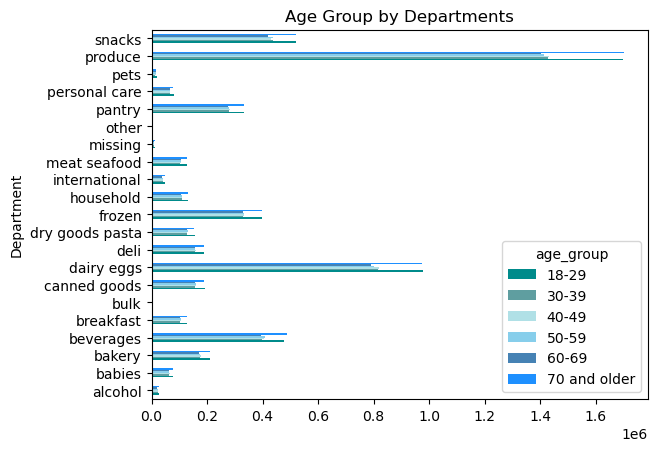

In [70]:
#Assigning colors to age groups

age_colors = ['darkcyan', 'cadetblue', 'powderblue', 'skyblue', 'steelblue', 'dodgerblue']

#Plotting bar chart 
age_by_dep_bar = age_by_dep.plot.barh(color = age_colors)
plt.title("Age Group by Departments")
plt.ylabel("Department")

In [71]:
age_by_dep_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/age_by_dep_bar.png')

In [72]:
#Crosstab income by department

inc_by_dep = pd.crosstab(df_final['department'],df_final['income_group'], dropna = False)
inc_by_dep

income_group,"100,001 to 200,000","200,001 to 400,000","400,001+","50,000 or less","50,001 to 100,000"
department,,,,,
alcohol,63015,4673,1454,18047,57438
babies,194592,1707,397,29240,184456
bakery,515099,10539,2065,106757,486368
beverages,1101776,20212,4449,383121,1062343
breakfast,291065,5455,1074,91408,281848
bulk,14191,23,4,4676,14557
canned goods,476137,7231,1858,78975,447873
dairy eggs,2361853,36340,7967,502363,2268659
deli,454781,6056,1252,106448,435297


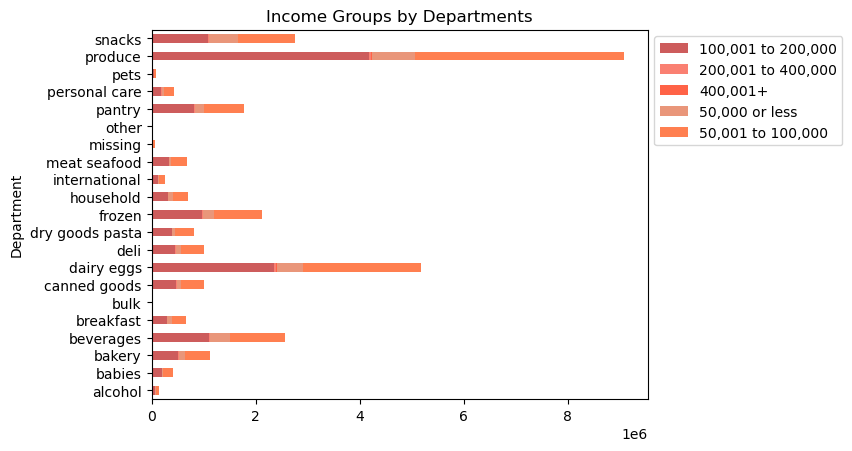

In [73]:
#Assigning colors to income groups

income_colors = ['indianred', 'salmon', 'tomato', 'darksalmon', 'coral']

#Plotting bar chart 
inc_by_dep_bar = inc_by_dep.plot.barh(color = income_colors, stacked=True)
plt.title("Income Groups by Departments")
plt.ylabel("Department")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [74]:
inc_by_dep_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/inc_by_dep_bar.png')

In [75]:
#Crosstab gender by department

gen_by_dep = pd.crosstab(df_final['Gender'],df_final['department'], dropna = False)
gen_by_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Gender,,,,,,,,,,,,,,,,,,,,,
Female,74844,200641,559143,1280384,334473,16742,498501,2574661,499243,408099,...,348932,126628,333484,31884,17155,884109,211924,45367,4501275,1377856
Male,69783,209751,561685,1291517,336377,16709,513573,2602521,504591,414037,...,350925,129363,341297,32884,17256,898596,212382,47693,4577998,1388550


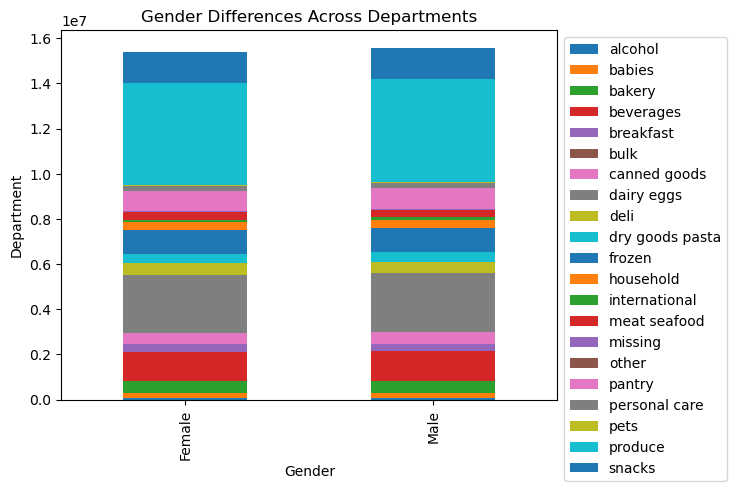

In [76]:
#Plotting bar chart 
gen_by_dep_bar = gen_by_dep.plot.bar(stacked=True)
plt.title("Gender Differences Across Departments")
plt.ylabel("Department")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [77]:
gen_by_dep_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/gen_by_dep_bar.png')

In [78]:
#Crosstab spender flag by department

spend_by_dep = pd.crosstab(df_final['department'],df_final['spender_flag'], dropna = False)
spend_by_dep

spender_flag,High spender,Low spender
department,,
alcohol,12803,131824
babies,4529,405863
bakery,28371,1092457
beverages,58474,2513427
breakfast,15046,655804
bulk,113,33338
canned goods,20432,991642
dairy eggs,109081,5068101
deli,16797,987037


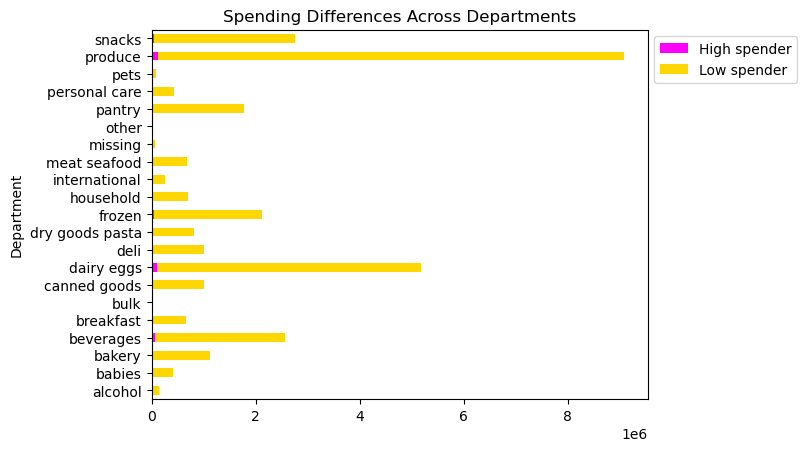

In [79]:
#Assigning colors to high/low spenders

spender_colors = ['magenta', 'gold']

#Plotting bar chart 
spend_by_dep_bar = spend_by_dep.plot.barh(color = spender_colors, stacked=True)
plt.title("Spending Differences Across Departments")
plt.ylabel("Department")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [80]:
spend_by_dep_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/spend_by_dep_bar.png')

In [81]:
df_final.shape

(30964564, 33)

In [82]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spender_flag', 'frequency_flag', 'Gender',
       'STATE', 'Age', 'n_dependants', 'fam_status', 'income', 'region',
       'activity_flag', 'age_group', 'income_group', 'family_flag',
       'parent_flag', 'department'],
      dtype='object')

In [83]:
df_final.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,n_dependants,fam_status,income,region,activity_flag,age_group,income_group,family_flag,parent_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,Midwest,Mod-High activity,70 and older,"50,000 or less",married adult with dependent,older parent,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,Midwest,Mod-High activity,70 and older,"50,000 or less",married adult with dependent,older parent,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,Northeast,Mod-High activity,60-69,"100,001 to 200,000",married adult with dependent,older parent,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,2,married,57797,West,Mod-High activity,50-59,"50,001 to 100,000",married adult with dependent,older parent,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,3,living with parents and siblings,34171,South,Mod-High activity,18-29,"50,000 or less",living with parents and siblings,young parent,snacks


In [84]:
df_final['activity_flag'].value_counts()

Mod-High activity    30964564
Name: activity_flag, dtype: int64

<Axes: title={'center': 'Distribution of Orders by Hour of Day'}, xlabel='Hour of Day', ylabel='Frequency'>

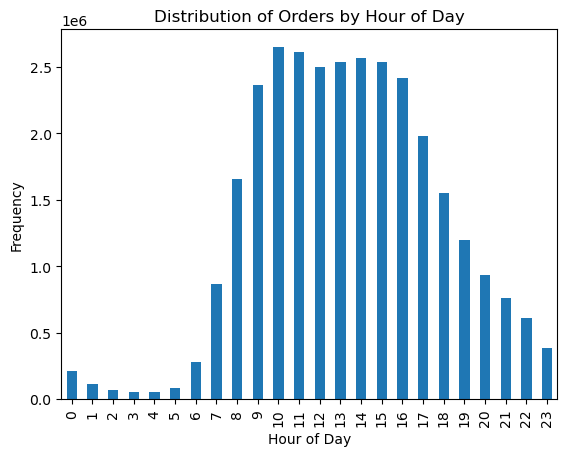

In [85]:
order_hour_bar = df_final['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title("Distribution of Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel('Frequency')
order_hour_bar

In [86]:
order_hour_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/hour_of_day.png')

<Axes: title={'center': 'Distribution of Orders by Day of Week'}, xlabel='Day of week', ylabel='Frequency'>

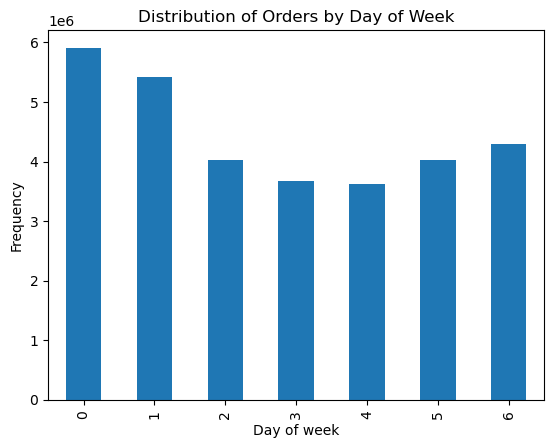

In [87]:
orders_day_week_bar = df_final['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title("Distribution of Orders by Day of Week")
plt.xlabel("Day of week")
plt.ylabel('Frequency')

orders_day_week_bar

In [88]:
orders_day_week_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/order_dof.png')

In [90]:
#Crosstab spender flag by department

loyalty_by_dep = pd.crosstab(df_final['department'],df_final['loyalty_flag'], dropna = False)
loyalty_by_dep

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


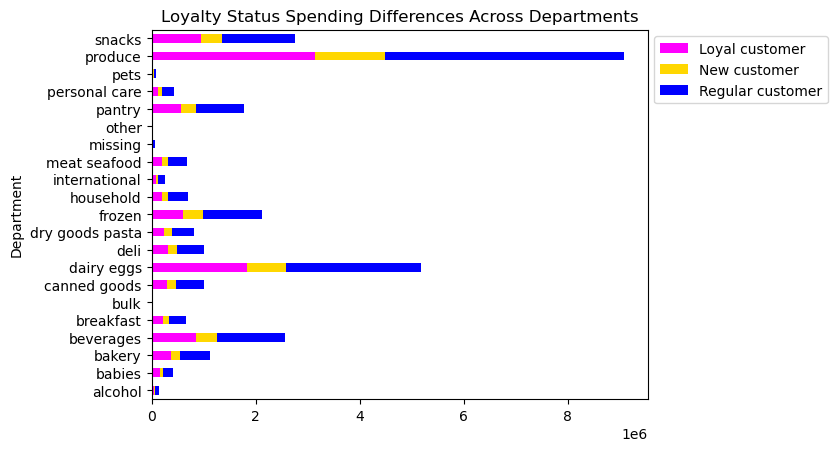

In [92]:
#Assigning colors to loyalty status

loyalty_colors = ['magenta', 'gold','blue']

#Plotting bar chart 
loyaly_bar = loyalty_by_dep.plot.barh(color = loyalty_colors, stacked=True)
plt.title("Loyalty Status Spending Differences Across Departments")
plt.ylabel("Department")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [93]:
loyaly_bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_by_dep.png')